# Step 0: load necessary libraries

In [1]:
import xarray as xr
import datetime
import pandas as pd
import numpy as np
import xesmf as xe
import time
import gc
import matplotlib.pyplot as plt

/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
def regrid_data_2006(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2006-01-01", "2015-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2015-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg.loc["2015-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    ds_merge_ts_reg_mask.loc["2015-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2015-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2015-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)


    
def regrid_data_2061(var, start_year, end_year, interval, height=True):
    t0 = time.time()
    print("******Start to process "+var+"******")
    ds = []
    # load the data
    start_time = time.time()
    for s_year in np.arange(start_year,end_year,interval):
        #print(s_year)
        e_year = s_year+interval-1
        s_s_year = str(s_year)
        s_e_year = str(e_year)
        print(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")
        temp_ds = xr.open_dataset(CMIP_dir+mod+"/"+var+"_day_"+mod+rcp+s_s_year+"0101-"+s_e_year+"1231.nc")[var]
        ds.append(temp_ds)
        del temp_ds
        gc.collect()
        elapsed_time = time.time() - start_time
        print("It takes elapsed_time", elapsed_time, "to load the data")

    # merge the time series
    print("*********Start to merge*********")
    start_time = time.time()
    ds_merge_ts = xr.merge(ds).sel(time=slice("2061-01-01", "2070-12-31"))
    del ds
    gc.collect()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to merge the time series")

    # build the regridder
    print("*********Start to build the regridder*********")
    start_time = time.time()
    regridder = xe.Regridder(ds_merge_ts, ds_out, 'patch', periodic=True, reuse_weights=True)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to build the regridder")

    # regrid the layer
    print("*********Start to regrid the layer*********")
    start_time = time.time()
    ds_merge_ts_reg = regridder(ds_merge_ts[var])
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to regrid the layer")

    # mask the layer
    print("*********Start to mask the layer*********")
    start_time = time.time()
    ds_merge_ts_reg_mask = ds_merge_ts_reg.where(mask)
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to mask the layer")

    # plot the layer
    print("*********Start to plot the layer*********")
    start_time = time.time()
    fig, ((ax1, ax2, ax3)) = plt.subplots(nrows=1, ncols=3,figsize=(18,3))
    ds_merge_ts[var].loc["2070-12-31"].plot(ax=ax1,
                                         vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                         vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg.loc["2070-12-31"].plot(ax=ax2,
                                        vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                        vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    ds_merge_ts_reg_mask.loc["2070-12-31"].plot(ax=ax3,
                                             vmax=ds_merge_ts[var].loc["2070-12-31"].max(),
                                             vmin=ds_merge_ts[var].loc["2070-12-31"].min())
    plt.show()
    elapsed_time = time.time() - start_time
    print("It takes elapsed_time", elapsed_time, "to plot the layer")
    
    elapsed_time = time.time() - t0
    print("It takes elapsed_time", elapsed_time, "to deal with "+var+" in total")
    print("******End "+var+"******")
    print("\n")
    
    if (height):
        return ds_merge_ts_reg_mask.rename(var).drop("height")
    else:
        return ds_merge_ts_reg_mask.rename(var)
    
#########################################################################################################
def get_ds_2006(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2006(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge


def get_ds_2061(start_year, end_year, interval):
    # define the variable list *****
    var_ls_height = ["huss","tas","uas","vas"]
    var_ls_no_height =["pr","prsn","rlds","rlus","rsds","rsus"]
    
    # get a list of variable DataArray
    temp_var = []
    for var in var_ls_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=True))
    for var in var_ls_no_height:
        temp_var.append(regrid_data_2061(var, start_year, end_year, interval, height=False))

    ds_merge = xr.merge(temp_var)
    
    return ds_merge

def get_urban_df(ds):
    start_time = time.time()
    df_all = ds.to_dataframe()
    df = df_all[~np.isnan(df_all["tas"])]
    print("It takes elapsed_time", time.time()-start_time, "to convert to dataframe and get urban grid")

    df["PRECT"] = df["pr"]/1000.0
    df["PRSN"] = df["prsn"]/1000.0
    df["FSNS"] = df["rsds"] - df["rsus"]
    df["FLNS"] = df["rlus"] - df["rlds"]
    df = df.rename(columns={
        "uas":"UBOT",
        "vas":"VBOT",
        "huss":"QBOT",
        "tas":"TREFHT"
    })
    df_final = df[["QBOT","UBOT","VBOT",
                   "TREFHT",
                   "FLNS","FSNS",
                   "PRECT","PRSN"]]
    return df_final

# Step 1: define the grid and mask 

In [3]:
# define the model
mod = "CNRM-CM5"
rcp = "_rcp85_r1i1p1_"

# define the grid mask 
CESM = xr.open_dataset("/glade/collections/cdg/data/cesmLE/CESM-CAM5-BGC-LE/lnd/proc/tseries/daily/TREFMXAV_U/b.e11.BRCP85C5CNBDRD.f09_g16.002.clm2.h1.TREFMXAV_U.20060101-20801231.nc")
grid = CESM["TREFMXAV_U"].loc["2006-01-02"]
mask = CESM["TREFMXAV_U"].loc["2006-01-02"].notnull().squeeze()
ds_out = xr.Dataset({'lat':(['lat'], grid["lat"].values),
                     'lon':(['lon'], grid["lon"].values)})

# define the load directory *****
CMIP_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_nc/"
# define the save directory *****
CMIP_save_dir = "/glade/scratch/zhonghua/CMIP5-RCP85_csv/"

# Step 2: 2006-2015 

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/huss_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.787212610244751 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/huss_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.3903038501739502 to load the data
*********Start to merge*********
It takes elapsed_time 2.8469319343566895 to merge the time series
*********Start to build the regridder*********
Create weight file: patch_128x256_192x288_peri.nc
It takes elapsed_time 45.31238269805908 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.692557334899902 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6639115810394287 to mask the layer
*********Start to plot the layer*********


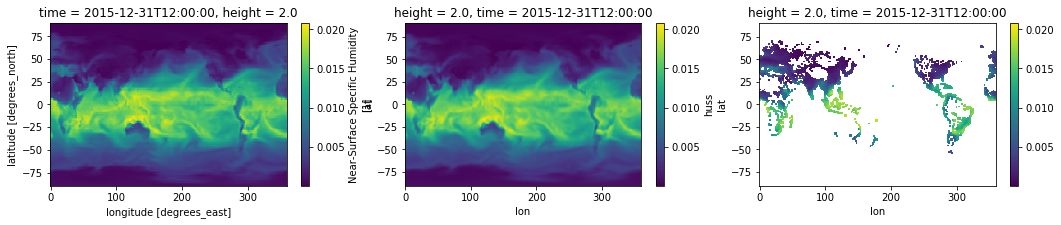

It takes elapsed_time 0.6910240650177002 to plot the layer
It takes elapsed_time 62.59832167625427 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/tas_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.9107921123504639 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/tas_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.2679698467254639 to load the data
*********Start to merge*********
It takes elapsed_time 2.745678186416626 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.02961444854736328 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.705370903015137 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.662714958190918 to mask the layer
*********Start to plot the layer*********


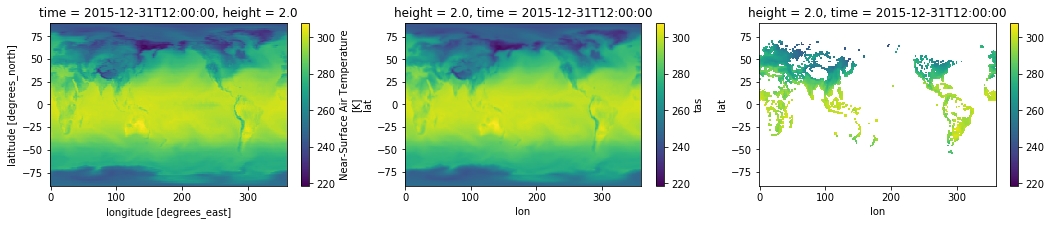

It takes elapsed_time 0.705364465713501 to plot the layer
It takes elapsed_time 17.117746591567993 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/uas_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5521478652954102 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/uas_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.0074107646942139 to load the data
*********Start to merge*********
It takes elapsed_time 2.7424137592315674 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.029477596282958984 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.751221656799316 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6637749671936035 to mask the layer
*********Start to plot the layer*********


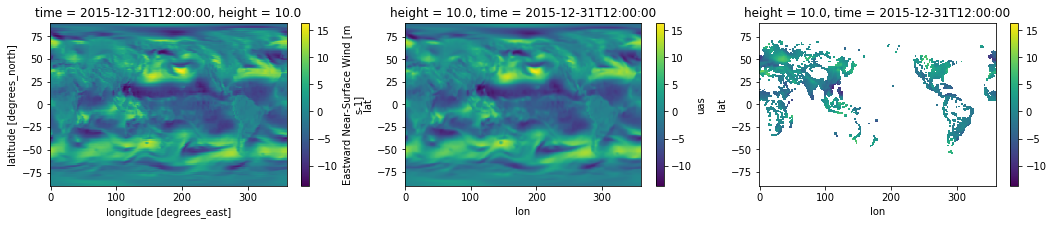

It takes elapsed_time 0.7088611125946045 to plot the layer
It takes elapsed_time 16.904196977615356 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/vas_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5152926445007324 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/vas_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 0.9287371635437012 to load the data
*********Start to merge*********
It takes elapsed_time 2.751307487487793 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.029853105545043945 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.742634773254395 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6674647331237793 to mask the layer
*********Start to plot the layer*********


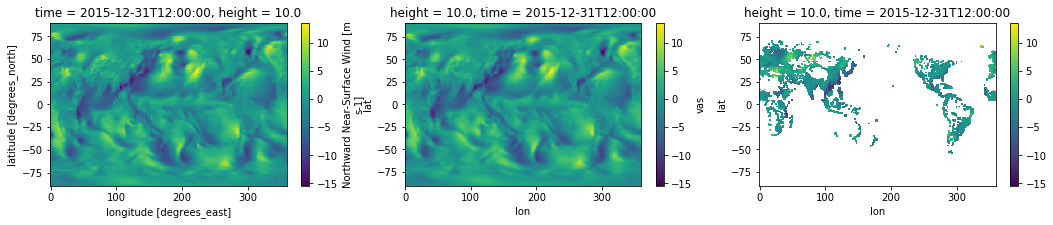

It takes elapsed_time 0.7400269508361816 to plot the layer
It takes elapsed_time 16.86109495162964 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/pr_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.481579065322876 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/pr_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 0.9212210178375244 to load the data
*********Start to merge*********
It takes elapsed_time 2.733860969543457 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.029802560806274414 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.749006509780884 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6639087200164795 to mask the layer
*********Start to plot the layer*********


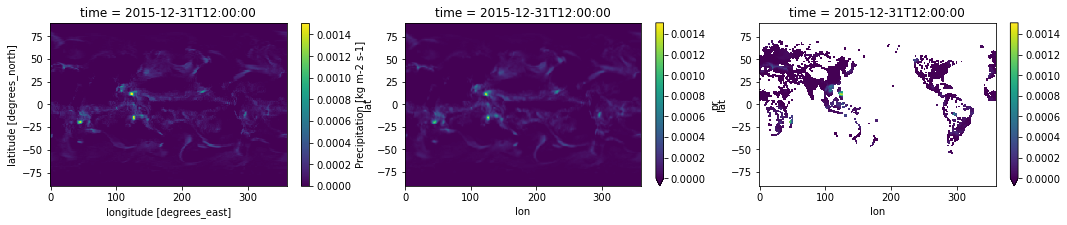

It takes elapsed_time 0.6946256160736084 to plot the layer
It takes elapsed_time 16.79325842857361 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/prsn_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5355339050292969 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/prsn_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.0013694763183594 to load the data
*********Start to merge*********
It takes elapsed_time 2.8023571968078613 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.030720233917236328 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.755678176879883 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6672933101654053 to mask the layer
*********Start to plot the layer*********


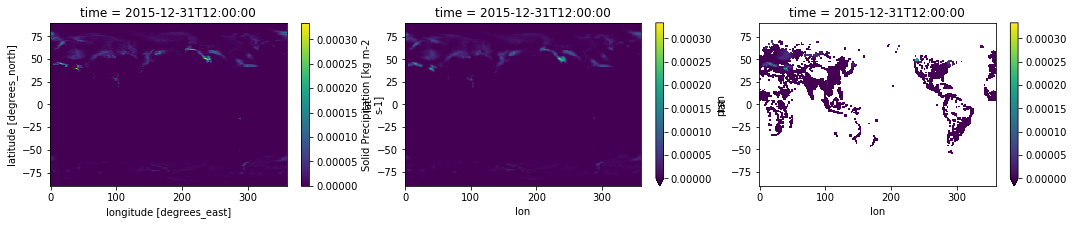

It takes elapsed_time 0.6828522682189941 to plot the layer
It takes elapsed_time 16.941320419311523 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rlds_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.5106425285339355 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rlds_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 1.025223731994629 to load the data
*********Start to merge*********
It takes elapsed_time 2.7263829708099365 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.03252744674682617 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.751139402389526 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6632988452911377 to mask the layer
*********Start to plot the layer*********


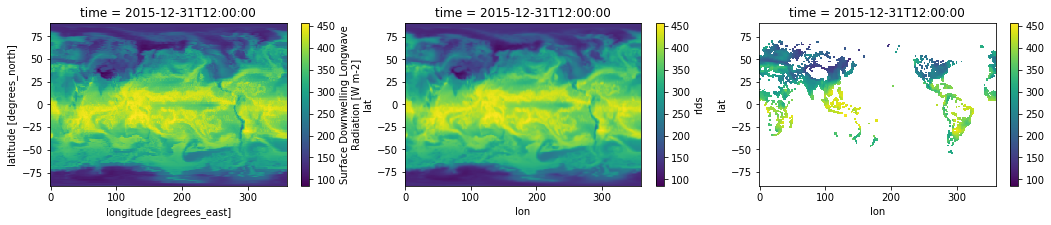

It takes elapsed_time 0.7178494930267334 to plot the layer
It takes elapsed_time 16.917529821395874 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rlus_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.47884416580200195 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rlus_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 0.9268426895141602 to load the data
*********Start to merge*********
It takes elapsed_time 2.7465388774871826 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.029846668243408203 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.677989482879639 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6536719799041748 to mask the layer
*********Start to plot the layer*********


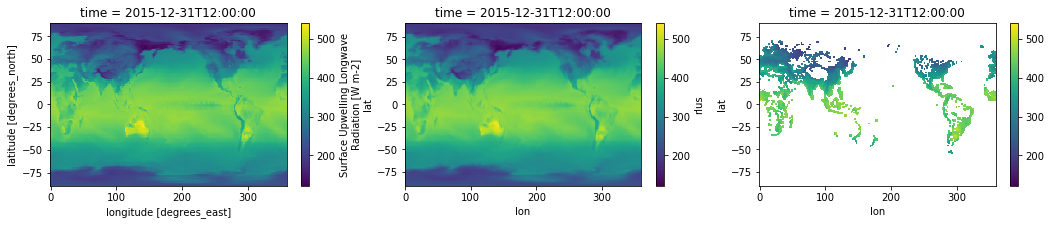

It takes elapsed_time 0.6738388538360596 to plot the layer
It takes elapsed_time 16.70976185798645 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rsds_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.4658839702606201 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rsds_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 0.9157040119171143 to load the data
*********Start to merge*********
It takes elapsed_time 2.754843235015869 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.029958009719848633 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.68410849571228 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6535108089447021 to mask the layer
*********Start to plot the layer*********


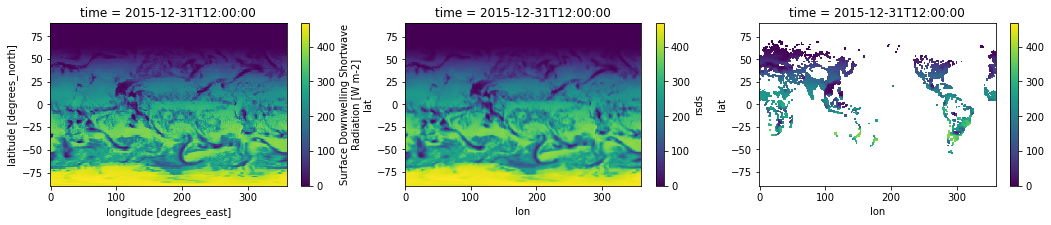

It takes elapsed_time 0.6766655445098877 to plot the layer
It takes elapsed_time 16.71579933166504 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rsus_day_CNRM-CM5_rcp85_r1i1p1_20060101-20101231.nc
It takes elapsed_time 0.49274492263793945 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rsus_day_CNRM-CM5_rcp85_r1i1p1_20110101-20151231.nc
It takes elapsed_time 0.9225609302520752 to load the data
*********Start to merge*********
It takes elapsed_time 2.7613182067871094 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.03083324432373047 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.681356191635132 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6536464691162109 to mask the layer
*********Start to plot the layer*********


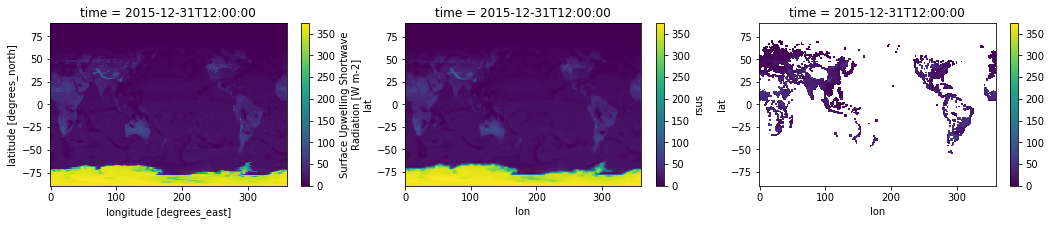

It takes elapsed_time 0.6981873512268066 to plot the layer
It takes elapsed_time 16.748802423477173 to deal with rsus in total
******End rsus******




In [4]:
ds = get_ds_2006(2006, 2016, 5)

In [5]:
df = get_urban_df(ds)

It takes elapsed_time 28.598883152008057 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [6]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2006.csv")
print(time.time()-start_time)

233.69523119926453


# Step 3: 2061-2070 

In [7]:
del ds, df
gc.collect()

0

******Start to process huss******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/huss_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.45094847679138184 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/huss_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 0.9154329299926758 to load the data
*********Start to merge*********
It takes elapsed_time 2.8113279342651367 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.03098154067993164 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.894773721694946 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6621439456939697 to mask the layer
*********Start to plot the layer*********


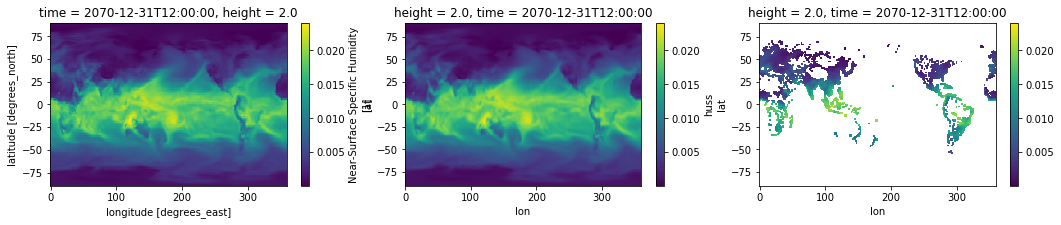

It takes elapsed_time 0.7077724933624268 to plot the layer
It takes elapsed_time 17.023391723632812 to deal with huss in total
******End huss******


******Start to process tas******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/tas_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.48259973526000977 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/tas_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 0.892596960067749 to load the data
*********Start to merge*********
It takes elapsed_time 2.8030731678009033 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.03130507469177246 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.907440662384033 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6700894832611084 to mask the layer
*********Start to plot the layer*********


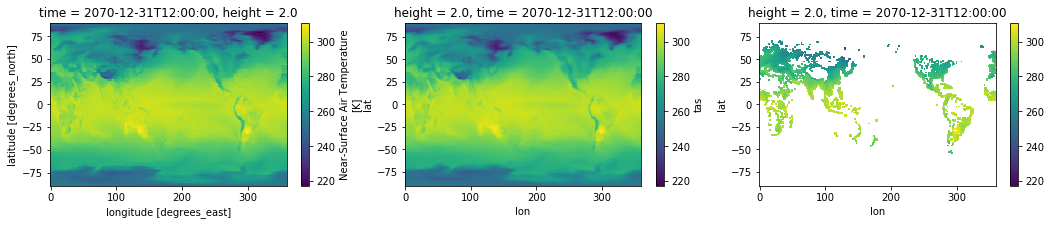

It takes elapsed_time 0.7229831218719482 to plot the layer
It takes elapsed_time 17.02818250656128 to deal with tas in total
******End tas******


******Start to process uas******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/uas_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.516660213470459 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/uas_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 0.995995044708252 to load the data
*********Start to merge*********
It takes elapsed_time 2.7800710201263428 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.029799222946166992 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.65296721458435 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6521155834197998 to mask the layer
*********Start to plot the layer*********


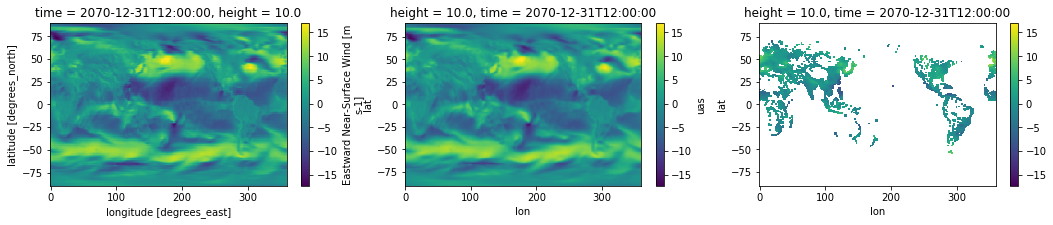

It takes elapsed_time 0.7166123390197754 to plot the layer
It takes elapsed_time 16.82840871810913 to deal with uas in total
******End uas******


******Start to process vas******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/vas_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.44066357612609863 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/vas_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 0.8833427429199219 to load the data
*********Start to merge*********
It takes elapsed_time 2.744765043258667 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.030249595642089844 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.689067840576172 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6577763557434082 to mask the layer
*********Start to plot the layer*********


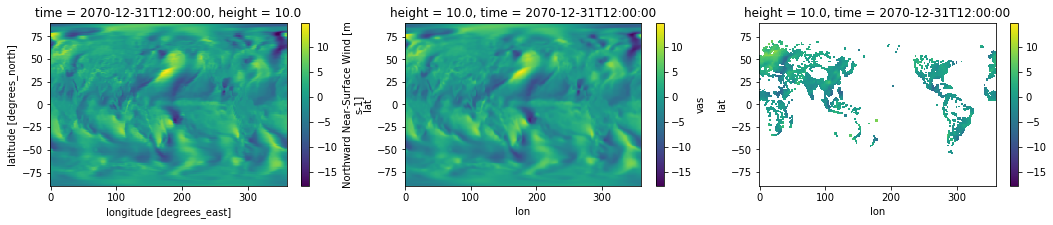

It takes elapsed_time 0.7102704048156738 to plot the layer
It takes elapsed_time 16.716126680374146 to deal with vas in total
******End vas******


******Start to process pr******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/pr_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5156326293945312 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/pr_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.051758050918579 to load the data
*********Start to merge*********
It takes elapsed_time 2.734837770462036 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.05085015296936035 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.726226329803467 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6558327674865723 to mask the layer
*********Start to plot the layer*********


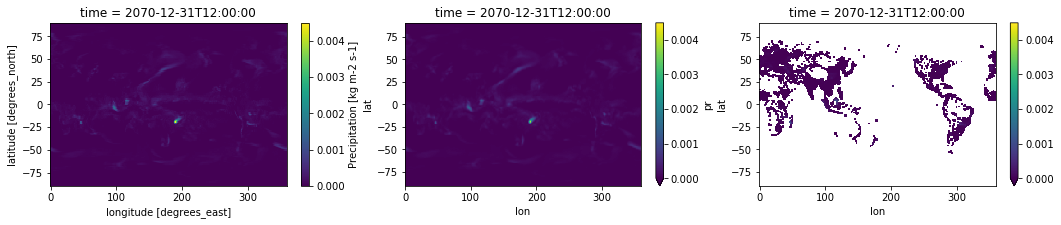

It takes elapsed_time 0.6535351276397705 to plot the layer
It takes elapsed_time 16.874271869659424 to deal with pr in total
******End pr******


******Start to process prsn******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/prsn_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.5575134754180908 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/prsn_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.0872104167938232 to load the data
*********Start to merge*********
It takes elapsed_time 2.7228996753692627 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.030093669891357422 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.681994199752808 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6561191082000732 to mask the layer
*********Start to plot the layer*********


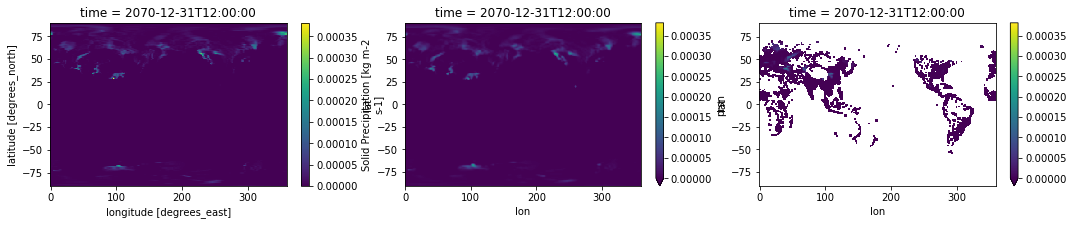

It takes elapsed_time 0.6737279891967773 to plot the layer
It takes elapsed_time 16.852744340896606 to deal with prsn in total
******End prsn******


******Start to process rlds******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rlds_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.47675347328186035 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rlds_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 1.0234105587005615 to load the data
*********Start to merge*********
It takes elapsed_time 2.7248244285583496 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.08432817459106445 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.726252794265747 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6537652015686035 to mask the layer
*********Start to plot the layer*********


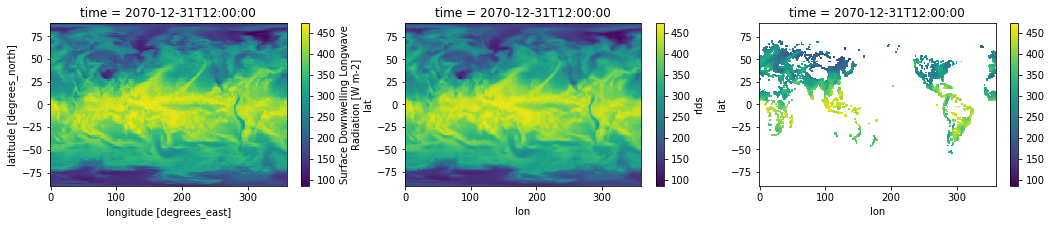

It takes elapsed_time 0.7262892723083496 to plot the layer
It takes elapsed_time 16.939727544784546 to deal with rlds in total
******End rlds******


******Start to process rlus******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rlus_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.48998546600341797 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rlus_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 0.9802355766296387 to load the data
*********Start to merge*********
It takes elapsed_time 2.731119394302368 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.030192852020263672 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.718228816986084 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.720461368560791 to mask the layer
*********Start to plot the layer*********


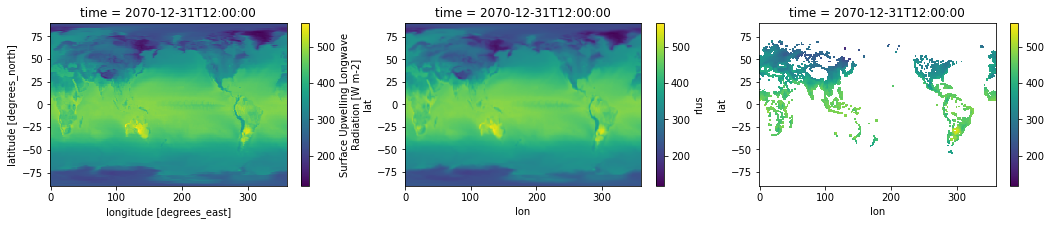

It takes elapsed_time 0.6767394542694092 to plot the layer
It takes elapsed_time 16.85763168334961 to deal with rlus in total
******End rlus******


******Start to process rsds******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rsds_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.46108078956604004 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rsds_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 0.881483793258667 to load the data
*********Start to merge*********
It takes elapsed_time 2.736693859100342 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.03071904182434082 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.712838888168335 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6544003486633301 to mask the layer
*********Start to plot the layer*********


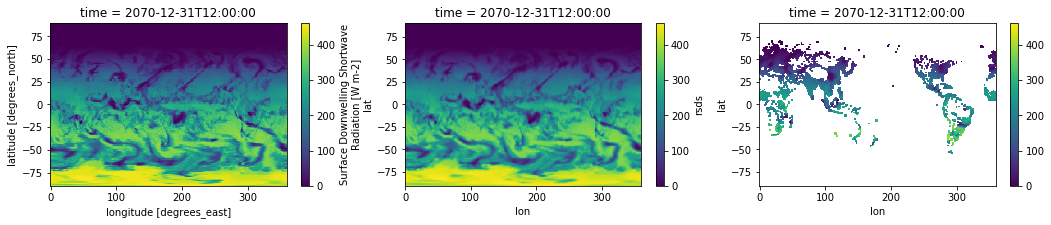

It takes elapsed_time 0.6781690120697021 to plot the layer
It takes elapsed_time 16.695298194885254 to deal with rsds in total
******End rsds******


******Start to process rsus******
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rsus_day_CNRM-CM5_rcp85_r1i1p1_20610101-20651231.nc
It takes elapsed_time 0.47283434867858887 to load the data
/glade/scratch/zhonghua/CMIP5/CNRM-CM5/rsus_day_CNRM-CM5_rcp85_r1i1p1_20660101-20701231.nc
It takes elapsed_time 0.9202141761779785 to load the data
*********Start to merge*********
It takes elapsed_time 2.7464828491210938 to merge the time series
*********Start to build the regridder*********
Reuse existing file: patch_128x256_192x288_peri.nc
It takes elapsed_time 0.08089685440063477 to build the regridder
*********Start to regrid the layer*********
It takes elapsed_time 11.694142818450928 to regrid the layer
*********Start to mask the layer*********
It takes elapsed_time 0.6538865566253662 to mask the layer
*********Start to plot the layer*********


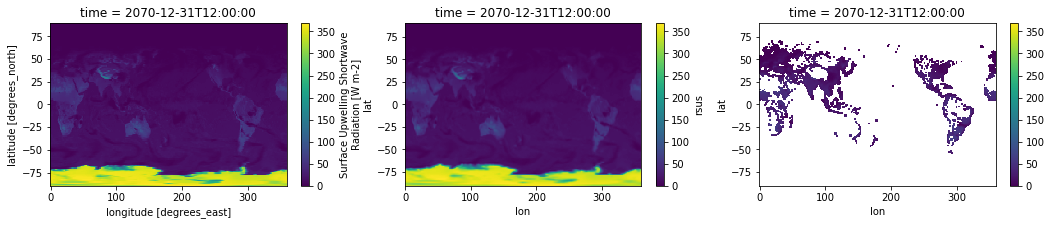

It takes elapsed_time 0.6991236209869385 to plot the layer
It takes elapsed_time 16.79582452774048 to deal with rsus in total
******End rsus******




In [8]:
ds = get_ds_2061(2061, 2071, 5)

In [9]:
df = get_urban_df(ds)

It takes elapsed_time 28.81201481819153 to convert to dataframe and get urban grid


/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:195: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:196: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/glade/work/zhonghua/miniconda3/envs/pangeo/lib/python3.6/site-packages/ipykernel_launcher.py:197: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

In [10]:
start_time=time.time()
df.to_csv(CMIP_save_dir+mod+"/2061.csv")
print(time.time()-start_time)

233.88539290428162
